## Sandbox for flood filling

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [13]:
def center_ellipse(x,y,r,c):

    draw.ellipse([x - r, y - r, x + r, y + r],fill=c)

def center_rectangle(x,y,l,w,c):
    l = l/2
    w = w/2
    draw.rectangle([x - w, y - l, x + w, y + l],fill=c)

Flood Filling

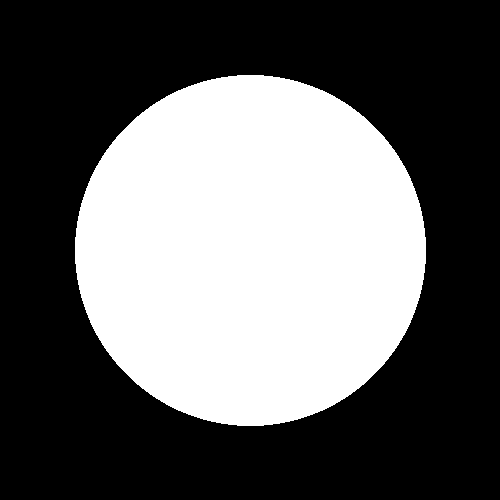

In [56]:
image_resolution = 500

img = Image.new('RGB', (image_resolution, image_resolution))
draw = ImageDraw.Draw(img)

threshold = 0.5

# drawing boundary
radius = 175
thickness = 10
center_point = (image_resolution / 2, image_resolution / 2)
center_ellipse(*center_point, radius, f'rgb({255},{255},{255})')
center_ellipse(*center_point, radius - thickness / 2, f'rgb({0},{0},{0})')


def is_valid(width, height, x, y, start_color, visited):

    pixels = img.load()

    if x < 0 or x > width:
        return False
    if y < 0 or y > height:
        return False
    if pixels[x,y] != start_color:
        return False
    if visited[x,y] == 1:
        return False

    return True
        
def flood_fill(x,y, start_color, new_color,img):
    start_color = (0,0,0)
    pixels = img.load()
    width = img.size[0]
    height = img.size[1]

    visited = np.zeros((width, height))
    queue = []
    queue.append([x,y])

    visited[x,y] = 1

    while len(queue) > 0:
        current = queue[0]
        x = current[0]
        y = current[1]

        pixels[x,y] = new_color

        queue.pop(0)

        _x = x + 1
        _y = y
        if is_valid(width, height, _x,_y, start_color, visited):
            queue.append([_x,_y])
            visited[_x,_y] = 1
            pixels[_x,_y] = new_color
            
        _x = x - 1
        _y = y
        if is_valid(width, height, _x,_y, start_color, visited):
            queue.append([_x,_y])
            visited[_x,_y] = 1
            pixels[_x,_y] = new_color

        _x = x
        _y = y + 1
        if is_valid(width, height, _x,_y, start_color, visited):
            queue.append([_x,_y])
            visited[_x,_y] = 1
            pixels[_x,_y] = new_color

        _x = x
        _y = y - 1
        if is_valid(width, height, _x,_y, start_color, visited):
            queue.append([_x,_y])
            visited[_x,_y] = 1
            pixels[_x,_y] = new_color



flood_fill(250,250,(0,0,0),(255,255,255),img)

img
